# Clustering y K-means


### Contexto:


In [1]:
import pandas as pd

In [8]:
data = pd.read_csv("/home/ignacia/Escritorio/Ignacia/MArchine Learning/Dataset/archive/2018-personality-data.csv")


In [11]:
data.shape

(1834, 34)

In [12]:
data.columns.values

array(['userid', ' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion', ' assigned metric',
       ' assigned condition', ' movie_1', ' predicted_rating_1',
       ' movie_2', ' predicted_rating_2', ' movie_3',
       ' predicted_rating_3', ' movie_4', ' predicted_rating_4',
       ' movie_5', ' predicted_rating_5', ' movie_6',
       ' predicted_rating_6', ' movie_7', ' predicted_rating_7',
       ' movie_8', ' predicted_rating_8', ' movie_9',
       ' predicted_rating_9', ' movie_10', ' predicted_rating_10',
       ' movie_11', ' predicted_rating_11', ' movie_12',
       ' predicted_rating_12', ' is_personalized', ' enjoy_watching '],
      dtype=object)

In [17]:
data = data[['userid', ' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion']]

In [18]:
data 

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5
...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5


In [28]:
import random
df_shuffled=pd.DataFrame(data.sample(frac=0.005452562704).reset_index(drop=True))
df_shuffled

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,7c5099a1f9ca585f2a043dd5ef0f91b6,4.0,3.5,4.5,4.0,2.0
1,318b8b8173dbe08826361d569469d89e,4.5,5.0,5.0,4.5,4.0
2,d8e59db65c4c2f7bfea129d1c2d51b27,5.5,2.0,3.5,3.5,1.0
3,a9c0a02a48e3206e3efa9572b9cbed74,6.5,4.5,6.0,4.5,5.0
4,b72d1cea770268863d0d2d29a1bd5ec7,6.0,4.0,3.0,5.0,3.0
5,824a2867b48467d025906445b556276f,5.0,4.5,5.5,5.0,6.0
6,68c062e8e896ff6dc72e5528dd19d69f,4.0,5.0,3.0,5.0,3.5
7,1b4a5948994040a3a8d07007fe19169f,6.5,5.0,5.5,5.5,4.5
8,f6ce380bdf17ac1411ed7b13bee948e3,5.0,4.0,5.5,4.5,3.5
9,0ff83e41ebcddf20568ed8ce622635c1,3.5,4.5,4.5,4.0,2.5


In [29]:
from scipy.spatial import distance_matrix

In [30]:
personality = df_shuffled.columns.values.tolist()[1: ]
personality

[' openness',
 ' agreeableness',
 ' emotional_stability',
 ' conscientiousness',
 ' extraversion']

In [52]:
#Distancia de Manhatan
dd1 = distance_matrix(df_shuffled[personality], df_shuffled[personality], p = 1)
#Distancia ecludiana
dd2 = distance_matrix(df_shuffled[personality],df_shuffled[personality], p = 2)


In [55]:
dd2 = pd.DataFrame(dd2)

In [53]:
dd1 = pd.DataFrame(dd1)

In [56]:
dd2

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.645751,2.598076,4.330127,2.915476,4.472136,2.783882,4.242641,2.179449,1.224745
1,2.645751,0.000000,4.716991,2.500000,2.915476,2.236068,2.179449,2.345208,1.322876,2.000000
2,2.598076,4.716991,0.000000,5.522681,3.278719,6.144103,4.472136,5.500000,3.937004,3.708099
3,4.330127,2.500000,5.522681,0.000000,3.708099,1.936492,4.242641,1.322876,2.236068,4.213075
4,2.915476,2.915476,3.278719,3.708099,0.000000,4.062019,2.291288,3.162278,2.783882,3.162278
5,4.472136,2.236068,6.144103,1.936492,4.062019,0.000000,3.708099,2.236068,2.598076,4.062019
6,2.783882,2.179449,4.472136,4.242641,2.291288,3.708099,0.000000,3.708099,2.915476,2.179449
7,4.242641,2.345208,5.500000,1.322876,3.162278,2.236068,3.708099,0.000000,2.291288,4.062019
8,2.179449,1.322876,3.937004,2.236068,2.783882,2.598076,2.915476,2.291288,0.000000,2.179449
9,1.224745,2.000000,3.708099,4.213075,3.162278,4.062019,2.179449,4.062019,2.179449,0.000000


In [54]:
dd1

,0,1,2,3,4,5,6,7,8,9
0,0.0,5.0,5.5,8.5,6.0,8.0,5.5,9.0,4.5,2.0
1,5.0,0.0,9.5,4.5,6.0,4.0,3.5,4.0,2.5,4.0
2,5.5,9.5,0.0,11.0,6.5,11.5,9.0,11.5,8.0,7.5
3,8.5,4.5,11.0,0.0,6.5,3.5,8.0,2.5,4.0,7.5
4,6.0,6.0,6.5,6.5,0.0,7.0,3.5,6.0,4.5,6.0
5,8.0,4.0,11.5,3.5,7.0,0.0,6.5,4.0,3.5,7.0
6,5.5,3.5,9.0,8.0,3.5,6.5,0.0,6.5,5.0,4.5
7,9.0,4.0,11.5,2.5,6.0,4.0,6.5,0.0,4.5,8.0
8,4.5,2.5,8.0,4.0,4.5,3.5,5.0,4.5,0.0,4.5
9,2.0,4.0,7.5,7.5,6.0,7.0,4.5,8.0,4.5,0.0


In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

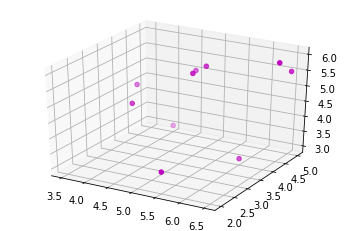

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = df_shuffled[" openness"], ys = df_shuffled[' agreeableness'], zs = df_shuffled[' emotional_stability'], c = 'm')

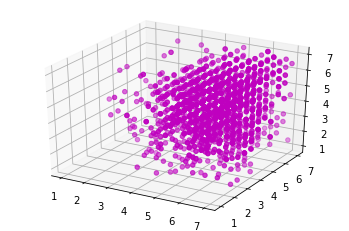

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = data[" openness"], ys = data[' agreeableness'], zs = data[' emotional_stability'], c = 'm')

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
df_shuffled = df_shuffled[[' openness',
 ' agreeableness',
 ' emotional_stability',
 ' conscientiousness',
 ' extraversion']]

In [72]:
df_shuffled

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,4.0,3.5,4.5,4.0,2.0
1,4.5,5.0,5.0,4.5,4.0
2,5.5,2.0,3.5,3.5,1.0
3,6.5,4.5,6.0,4.5,5.0
4,6.0,4.0,3.0,5.0,3.0
5,5.0,4.5,5.5,5.0,6.0
6,4.0,5.0,3.0,5.0,3.5
7,6.5,5.0,5.5,5.5,4.5
8,5.0,4.0,5.5,4.5,3.5
9,3.5,4.5,4.5,4.0,2.5


In [73]:
##Minimiza los cuadrados
z = linkage(df_shuffled, "ward")
z

array([[ 0.        ,  9.        ,  1.22474487,  2.        ],
       [ 1.        ,  8.        ,  1.32287566,  2.        ],
       [ 3.        ,  7.        ,  1.32287566,  2.        ],
       [ 4.        ,  6.        ,  2.29128785,  2.        ],
       [ 5.        , 12.        ,  2.29128785,  3.        ],
       [10.        , 11.        ,  2.93683503,  4.        ],
       [13.        , 15.        ,  3.56487494,  6.        ],
       [ 2.        , 16.        ,  4.60072458,  7.        ],
       [14.        , 17.        ,  6.70074623, 10.        ]])

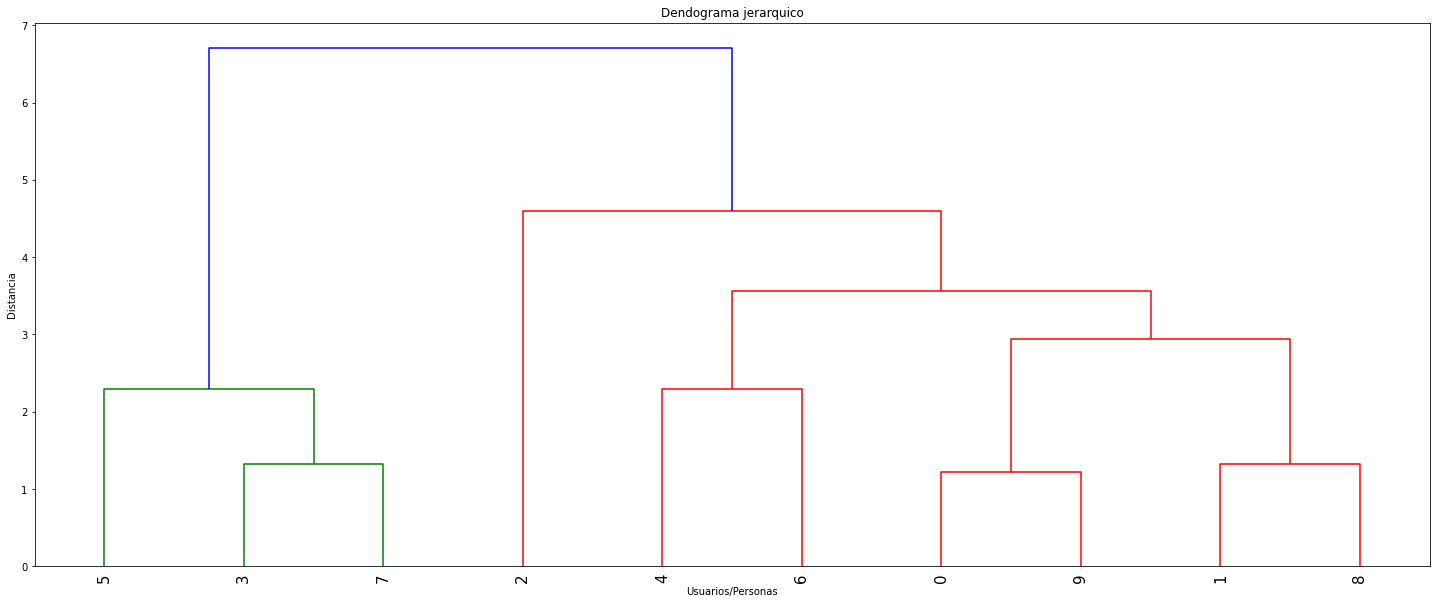

In [78]:
plt.figure(figsize = (25,10))
plt.title("Dendograma jerarquico")
dendrogram(z, leaf_rotation = 90., leaf_font_size = 15.0)
plt.ylabel("Distancia")
plt.xlabel("Usuarios/Personas")
plt.show()

In [79]:
z = linkage(df_shuffled, "average")
z

array([[ 0.        ,  9.        ,  1.22474487,  2.        ],
       [ 1.        ,  8.        ,  1.32287566,  2.        ],
       [ 3.        ,  7.        ,  1.32287566,  2.        ],
       [ 5.        , 12.        ,  2.08627983,  3.        ],
       [10.        , 11.        ,  2.25116256,  4.        ],
       [ 4.        ,  6.        ,  2.29128785,  2.        ],
       [14.        , 15.        ,  2.7294211 ,  6.        ],
       [13.        , 16.        ,  3.45444223,  9.        ],
       [ 2.        , 17.        ,  4.43086762, 10.        ]])

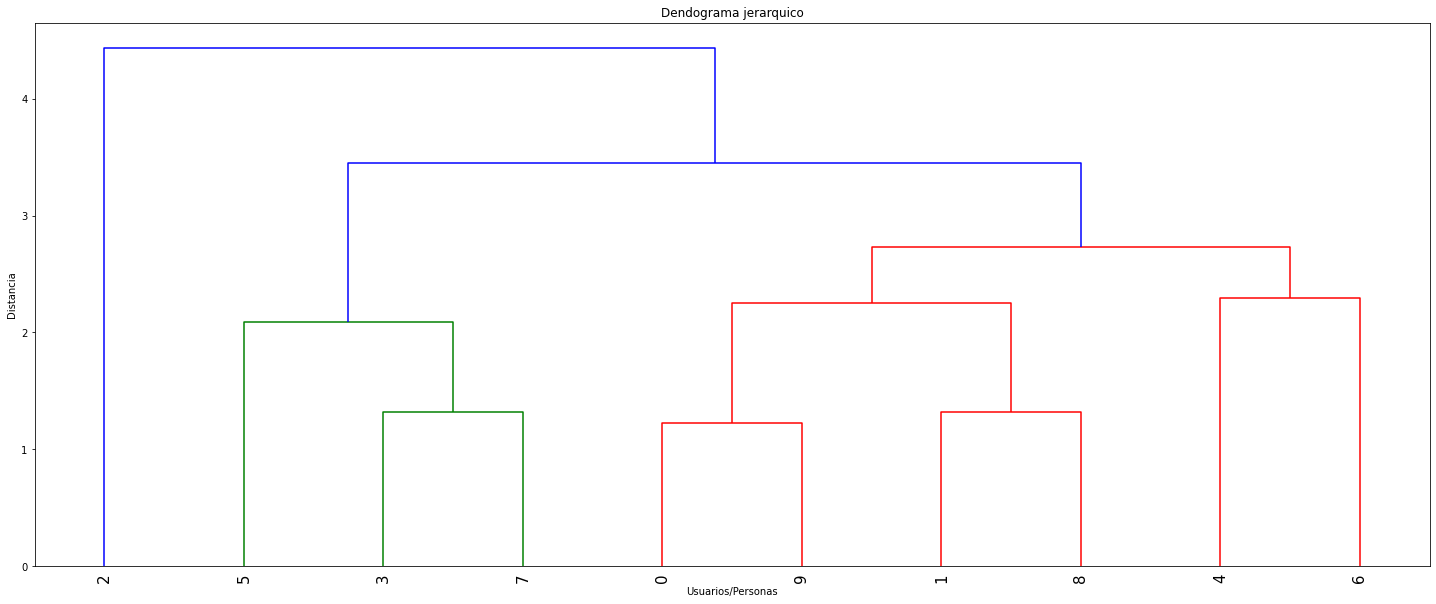

In [80]:
plt.figure(figsize = (25,10))
plt.title("Dendograma jerarquico")
dendrogram(z, leaf_rotation = 90., leaf_font_size = 15.0)
plt.ylabel("Distancia")
plt.xlabel("Usuarios/Personas")
plt.show()

In [81]:
z = linkage(df_shuffled, "centroid")
z

array([[ 0.        ,  9.        ,  1.22474487,  2.        ],
       [ 1.        ,  8.        ,  1.32287566,  2.        ],
       [ 3.        ,  7.        ,  1.32287566,  2.        ],
       [ 5.        , 12.        ,  1.98431348,  3.        ],
       [11.        , 13.        ,  2.00520157,  5.        ],
       [ 4.        ,  6.        ,  2.29128785,  2.        ],
       [10.        , 15.        ,  2.46221445,  4.        ],
       [14.        , 16.        ,  2.82190096,  9.        ],
       [ 2.        , 17.        ,  4.09832848, 10.        ]])

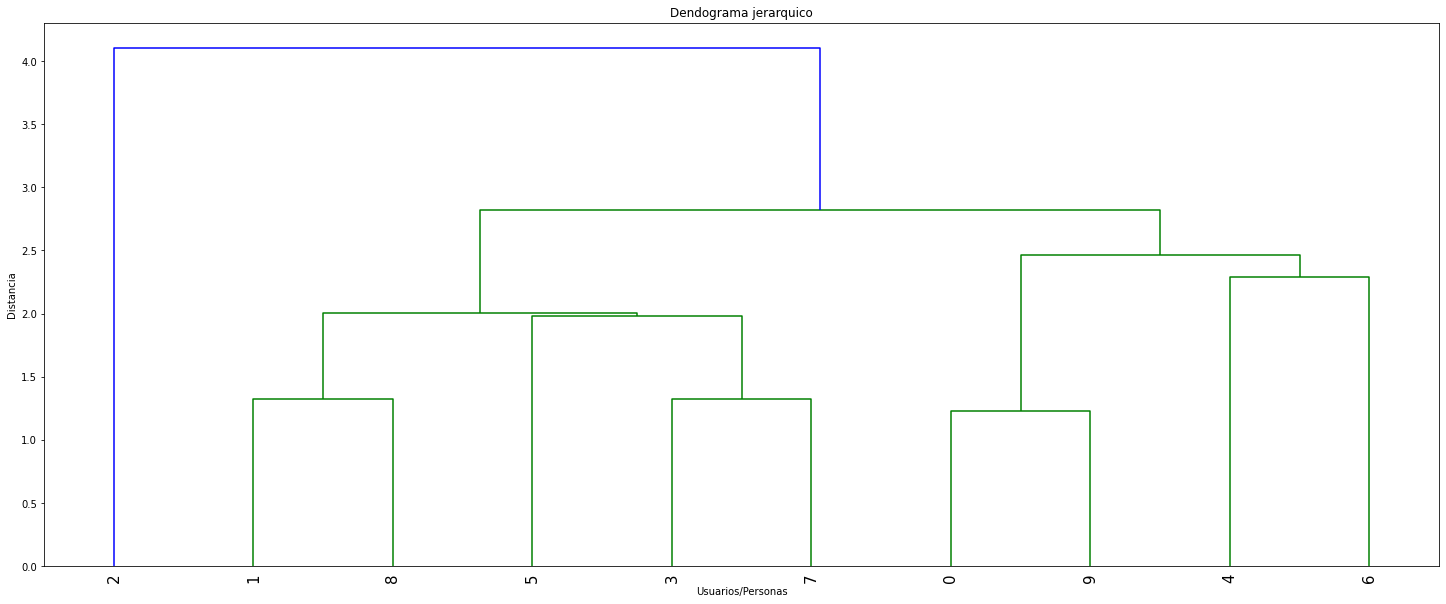

In [82]:
plt.figure(figsize = (25,10))
plt.title("Dendograma jerarquico")
dendrogram(z, leaf_rotation = 90., leaf_font_size = 15.0)
plt.ylabel("Distancia")
plt.xlabel("Usuarios/Personas")
plt.show()

# K-means

In [85]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline


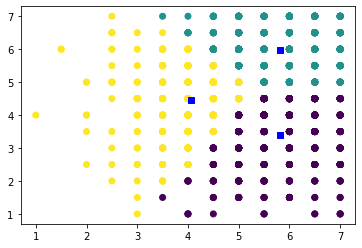

array([[5.80790191, 3.38964578],
       [5.81521739, 5.97670807],
       [4.0625    , 4.4495614 ]])

In [120]:
#K-means basado en
kmeans = cluster.KMeans(3)
kmeans.fit(data[[' openness',
 ' emotional_stability']])
labels = kmeans.labels_
plt.scatter(data[' openness'],
 data[' emotional_stability'], c = labels)

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
plt.show()
centroides


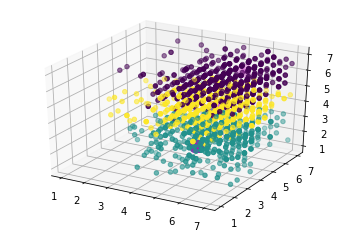

array([[5.51479751, 6.07866044, 6.07866044],
       [5.39980732, 2.83333333, 2.83333333],
       [5.22659733, 4.44725111, 4.44725111]])

In [143]:
#K-means basado en
kmeans = cluster.KMeans(3)
kmeans.fit(data[[' openness',
 ' emotional_stability',' emotional_stability']])
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = data[" openness"], ys = data[' agreeableness'], zs = data[' emotional_stability'],c = labels)
centroides = kmeans.cluster_centers_
#ax.scatter3D(xs = centroides[:,0], centroides[:,1], marker = 's', c = 'b')
centroides = kmeans.cluster_centers_
#plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
ax.scatter(centroides[:,0], centroides[:,1],centroides[:,1], marker = 's', c = 'm', linewidth = 9.0)
plt.show()
centroides



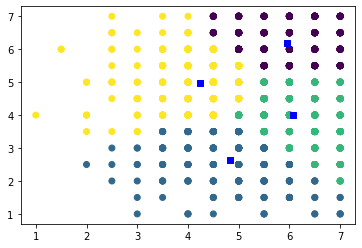

array([[5.95031712, 6.1987315 ],
       [4.834375  , 2.625     ],
       [6.07154882, 3.98737374],
       [4.23378076, 4.9787472 ]])

In [136]:
kmeans = cluster.KMeans(4)
kmeans.fit(data[[' openness',
 ' emotional_stability']])
labels = kmeans.labels_
plt.scatter(data[' openness'],
 data[' emotional_stability'], c = labels)

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
plt.show()
centroides

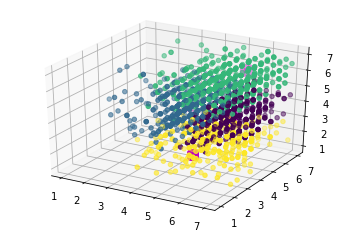

array([[6.06263499, 4.22786177, 4.22786177],
       [4.25174014, 4.32018561, 4.32018561],
       [5.60848287, 6.10277325, 6.10277325],
       [5.45259939, 2.46330275, 2.46330275]])

In [142]:
#K-means basado en
kmeans = cluster.KMeans(4)
kmeans.fit(data[[' openness',
 ' emotional_stability',' emotional_stability']])
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = data[" openness"], ys = data[' agreeableness'], zs = data[' emotional_stability'],c = labels)
centroides = kmeans.cluster_centers_
#ax.scatter3D(xs = centroides[:,0], centroides[:,1], marker = 's', c = 'b')
centroides = kmeans.cluster_centers_
#plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
ax.scatter(centroides[:,0], centroides[:,1],centroides[:,1], marker = 's', c = 'm', linewidths = 8.0)
plt.show()
centroides

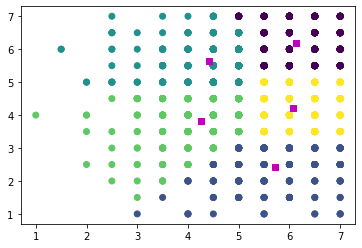

array([[6.13681592, 6.18159204],
       [5.71428571, 2.42857143],
       [4.42136499, 5.64688427],
       [4.25142045, 3.80823864],
       [6.06263499, 4.22786177]])

In [144]:
kmeans = cluster.KMeans(5)
kmeans.fit(data[[' openness',
 ' emotional_stability']])
labels = kmeans.labels_
plt.scatter(data[' openness'],
 data[' emotional_stability'], c = labels)

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'm')
plt.show()
centroides

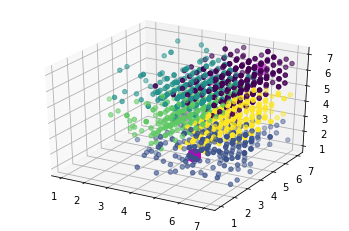

array([[6.09600998, 6.25935162, 6.25935162],
       [5.53365385, 2.44230769, 2.44230769],
       [4.54807692, 5.51648352, 5.51648352],
       [4.28125   , 3.9328125 , 3.9328125 ],
       [6.09610984, 4.1819222 , 4.1819222 ]])

In [145]:
kmeans = cluster.KMeans(5)
kmeans.fit(data[[' openness',
 ' emotional_stability',' emotional_stability']])
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = data[" openness"], ys = data[' agreeableness'], zs = data[' emotional_stability'],c = labels)
centroides = kmeans.cluster_centers_
#ax.scatter3D(xs = centroides[:,0], centroides[:,1], marker = 's', c = 'b')
centroides = kmeans.cluster_centers_
#plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
ax.scatter(centroides[:,0], centroides[:,1],centroides[:,1], marker = 's', c = 'm', linewidths = 8.0)
plt.show()
centroides

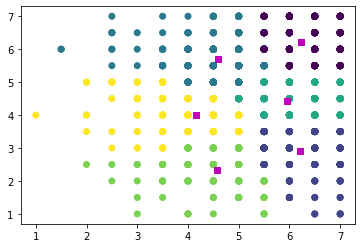

array([[6.22375691, 6.20718232],
       [6.21532847, 2.91970803],
       [4.59776536, 5.7150838 ],
       [5.95384615, 4.44102564],
       [4.56687898, 2.34713376],
       [4.16211604, 4.00170648]])

In [146]:
kmeans = cluster.KMeans(6)
kmeans.fit(data[[' openness',
 ' emotional_stability']])
labels = kmeans.labels_
plt.scatter(data[' openness'],
 data[' emotional_stability'], c = labels)

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'm')
plt.show()
centroides

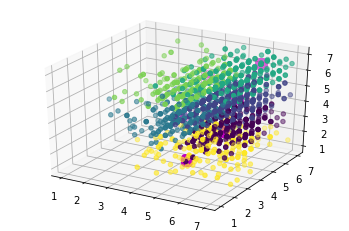

array([[6.09813084, 3.58411215, 3.58411215],
       [5.9       , 4.93625   , 4.93625   ],
       [4.21854305, 3.83940397, 3.83940397],
       [6.03797468, 6.46360759, 6.46360759],
       [4.30866426, 5.62815884, 5.62815884],
       [5.35550459, 2.20183486, 2.20183486]])

In [148]:
kmeans = cluster.KMeans(6)
kmeans.fit(data[[' openness',
 ' emotional_stability',' emotional_stability']])
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(xs = data[" openness"], ys = data[' agreeableness'], zs = data[' emotional_stability'],c = labels)
centroides = kmeans.cluster_centers_
#ax.scatter3D(xs = centroides[:,0], centroides[:,1], marker = 's', c = 'b')
centroides = kmeans.cluster_centers_
#plt.scatter(centroides[:,0], centroides[:,1], marker = 's', c = 'b')
ax.scatter(centroides[:,0], centroides[:,1],centroides[:,1], marker = 's', c = 'm', linewidths = 8.0)
plt.show()
centroides